In [111]:
import pandas as pd
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output # real-time updates to our plots 
from matplotlib.ticker import FormatStrFormatter
from time import gmtime, strftime

In [6]:
def csv_read(fidPath):
    df = pd.read_csv(fidPath, header = 0, sep = ',')
    # Convert the format of date
    df.time = pd.to_datetime(df.time, format='%Y%m%d%H%M%S')
    return df

def creat_new_col(df, nameList):
    for ii in nameList:
        string = str(ii)
        df[string] = None
    return df

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine equatiom
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371
    return c * r * 1000

In [4]:
df = csv_read("9992_gpsV.csv") # Path of the raw data
NameList = ["deltaT", "distance", "velocity"]
df = creat_new_col(df, NameList)
df.head()

,time,latitude,longitude,deltaT,distance,velocity
0,2019-10-22 14:19:17,24.081049,121.013716,None,None,None
1,2019-10-22 14:20:28,24.081043,121.013738,None,None,None
2,2019-10-22 14:20:37,24.081043,121.013738,None,None,None
3,2019-10-22 14:20:46,24.081052,121.013674,None,None,None
4,2019-10-22 14:20:55,24.081054,121.013647,None,None,None


In [7]:
df.deltaT = df.time.diff()
for ii in range(0,len(df)-1):
    df.distance[ii+1] = haversine(df.longitude[ii], df.latitude[ii], df.longitude[ii+1], df.latitude[ii+1])
    df.velocity[ii+1] = df.distance[ii+1]/df.deltaT[ii+1].seconds
df.distance = pd.to_numeric(df.distance)   
df.velocity = pd.to_numeric(df.velocity)

D:\PythonProgm\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\PythonProgm\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [66]:
#df1 = df[df.distance > 0 ]
#df1 = df1[df1.distance < 50]
df1 = df[df.velocity > 0.01]
print(df1.head(10))
print(df1.tail(10))

                  time   latitude   longitude   deltaT   distance  velocity
1  2019-10-22 14:20:28  24.081043  121.013738 00:01:11   2.330907  0.032830
3  2019-10-22 14:20:46  24.081052  121.013674 00:00:09   6.573744  0.730416
4  2019-10-22 14:20:55  24.081054  121.013647 00:00:09   2.749981  0.305553
5  2019-10-22 14:22:06  24.081038  121.013635 00:01:11   2.156224  0.030369
6  2019-10-22 14:22:15  24.081041  121.013633 00:00:09   0.390515  0.043391
7  2019-10-22 14:22:24  24.081042  121.013634 00:00:09   0.150566  0.016730
8  2019-10-22 14:22:33  24.081048  121.013629 00:00:09   0.838308  0.093145
9  2019-10-22 14:22:42  24.081058  121.013650 00:00:09   2.404432  0.267159
10 2019-10-22 14:23:53  24.081204  121.013712 00:01:11  17.411868  0.245238
11 2019-10-22 14:24:02  24.081203  121.013711 00:00:09   0.150566  0.016730
                   time   latitude   longitude   deltaT   distance  velocity
138 2019-10-22 15:14:17  24.081508  121.012904 00:00:09   5.509110  0.612123
139 2019-1

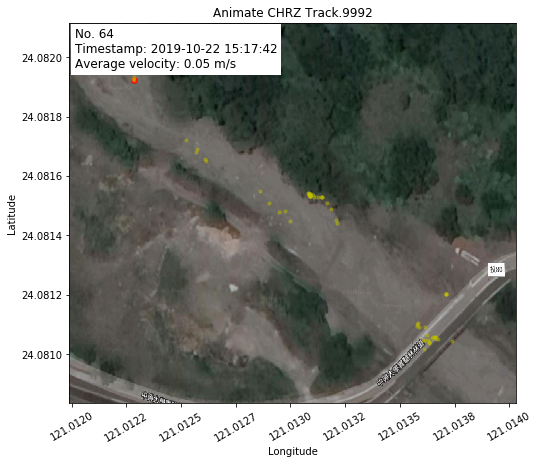

In [139]:
BBox = [ df1.longitude.min(), df1.longitude.max(),      
         df1.latitude.min(),  df1.latitude.max()]

for ii in range(0, len(df1)):
    #len(df1)
    fig, ax = plt.subplots(num=1, figsize = (8,7))
    ax.scatter(df1.longitude, df1.latitude, zorder=2, alpha= 0.4, c='y', s=10)
    plt.scatter(df1.longitude.iloc[ii], df1.latitude.iloc[ii], zorder=1, alpha= 1, c='r', s=30)
    ax.set_title('Animate CHRZ Track.9992')
    
    invLong = BBox[1] - BBox[0]
    invLati = BBox[3] - BBox[2]
    multipCoeff = 0.2   

    newBBox = [BBox[0] - multipCoeff*invLong ,BBox[1]+ multipCoeff*invLong,
               BBox[2] - multipCoeff*invLati, BBox[3]+ multipCoeff*invLati]
    
    sateIMG = plt.imread("satellite_map.JPG")
    ax.imshow(sateIMG, zorder=0, extent = newBBox, aspect= 'auto')
    
    ax.set_xlim(newBBox[0], newBBox[1])
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    plt.xticks(rotation = 30)
    ax.set_ylim(newBBox[2], newBBox[3])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    ax.text(BBox[0] - 0.183*invLong, BBox[3]+ 0.035*invLati,
         "No. {}\n".format(int(ii)) + 
         "Timestamp: {}\n".format(df1.time.iloc[ii]) +
         "Average velocity: {} m/s".format(round(df1.velocity.iloc[ii],3)),
         fontsize = 12, 
         bbox = dict(facecolor="white", alpha = 1, edgecolor = "none" ))
    

    
    display(fig)    
    clear_output(wait = True)
    plt.pause(0.1)
    now = strftime("%Y%m%d%H%M%S")
    fig.savefig('CHRZ_ana_' + str(ii) + '_' + now +'.jpg', dpi= 100)
#ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [67]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df1)
    print(df1.info())

                   time   latitude   longitude   deltaT   distance  velocity
1   2019-10-22 14:20:28  24.081043  121.013738 00:01:11   2.330907  0.032830
3   2019-10-22 14:20:46  24.081052  121.013674 00:00:09   6.573744  0.730416
4   2019-10-22 14:20:55  24.081054  121.013647 00:00:09   2.749981  0.305553
5   2019-10-22 14:22:06  24.081038  121.013635 00:01:11   2.156224  0.030369
6   2019-10-22 14:22:15  24.081041  121.013633 00:00:09   0.390515  0.043391
7   2019-10-22 14:22:24  24.081042  121.013634 00:00:09   0.150566  0.016730
8   2019-10-22 14:22:33  24.081048  121.013629 00:00:09   0.838308  0.093145
9   2019-10-22 14:22:42  24.081058  121.013650 00:00:09   2.404432  0.267159
10  2019-10-22 14:23:53  24.081204  121.013712 00:01:11  17.411868  0.245238
11  2019-10-22 14:24:02  24.081203  121.013711 00:00:09   0.150566  0.016730
13  2019-10-22 14:24:20  24.081202  121.013712 00:00:09   0.150566  0.016730
14  2019-10-22 14:24:29  24.081202  121.013711 00:00:09   0.101517  0.011280